### 1. How to import the required libraries?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### All standard libraries used in data analysis are imported—pandas, numpy, seaborn, and matplotlib.pyplot. These are essential for data wrangling and visualization.

### 2. How to load the Titanic dataset?

In [6]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Dataset is loaded using pd.read_csv(). This implies you are working with a CSV file named "Titanic-Dataset.csv".

### 3. How to view the number of rows and columns?

In [7]:
df.shape

(891, 12)

#### df.shape is used. It provides a quick overview of the dataset size, which helps in understanding the data volume.

### 4. How to display basic information about the dataset?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### df.info() gives data types, non-null counts, and memory usage—crucial to identify missing values and data structure

### 5. How to describe all columns including categorical data?

In [12]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### df.describe(include='all') summarizes both numerical and categorical features, helping to detect data distributions and anomalies.

### 6. How to check for missing values in the dataset?

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### df.isnull().sum() is used to count missing entries. This helps in deciding how to clean the data.

### 7. How to handle missing values in the dataset?

In [28]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\shubh\AppData\Local\Temp\ipykernel_19200\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [27]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [26]:
df['Cabin'].fillna('Unknown', inplace=True)

#### 
Age: Missing values filled with median — robust against outliers.

Embarked: Filled with mode — appropriate for categorical data.

Cabin: Filled with "Unknown" — acceptable if many missing.

### 8. How to create new features (Feature Engineering)?

In [30]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

#### 
Extracted Title from Name — useful for identifying social status.

FamilySize created — often correlates with survival.

Converted Sex into numeric — makes it ML-ready.

Started mapping Embarked — a step toward encoding.

### 9. How to visualize the age distribution?

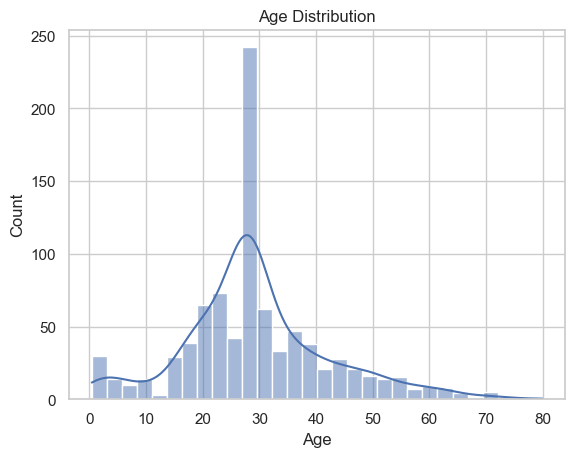

In [31]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

#### Using sns.histplot with KDE shows how passenger ages are distributed. This helps identify common age groups (e.g., children, young adults) and possible skewness.

### 10. How to count the number of passengers by gender?

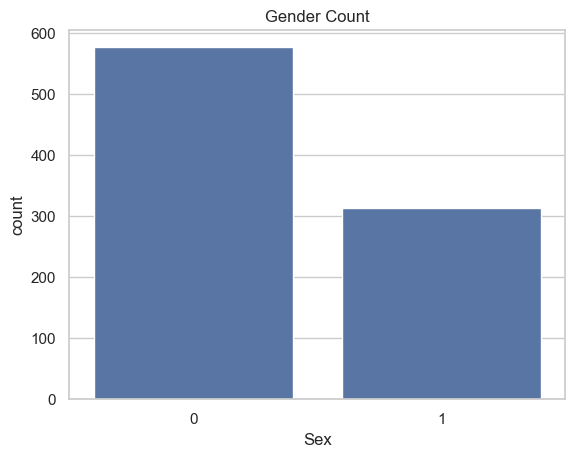

In [32]:
sns.countplot(x='Sex', data=df)
plt.title("Gender Count")
plt.show()

#### A countplot shows the count of male and female passengers. Typically, males are more than females in this dataset—important for gender-based survival analysis.

### 11. How to visualize the passenger class distribution?

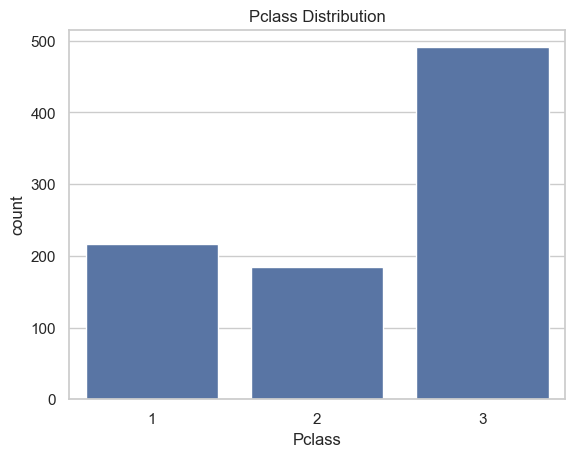

In [33]:
sns.countplot(x='Pclass', data=df)
plt.title("Pclass Distribution")
plt.show()

#### This highlights how many passengers belong to each class (1st, 2nd, 3rd). Useful for understanding social stratification and survival tendencies.

### 12. How to plot the Fare distribution?

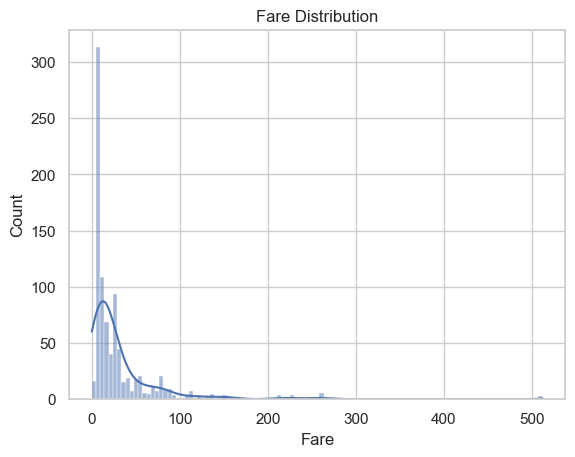

In [34]:
sns.histplot(df['Fare'], kde=True)
plt.title("Fare Distribution")
plt.show()

#### Fare values are often right-skewed (few passengers paid very high fares). This helps detect outliers and decide on transformations if required.

### 13. How to visualize embarkation port distribution?

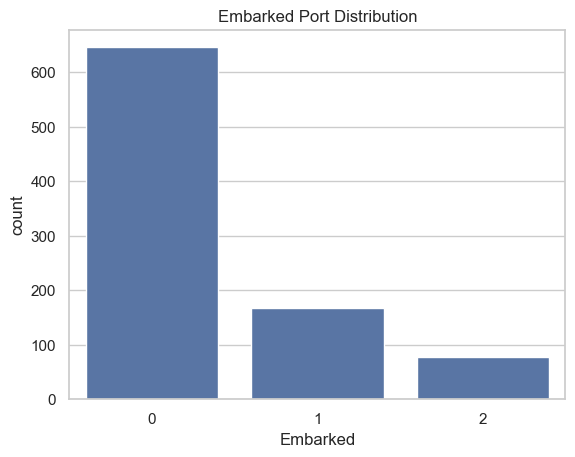

In [35]:
sns.countplot(x='Embarked', data=df)
plt.title("Embarked Port Distribution")
plt.show()

#### Shows which ports (C, Q, S) were most used. Helps analyze regional factors and compare survival by port.

### 14. How to view the number of survivors vs non-survivors?

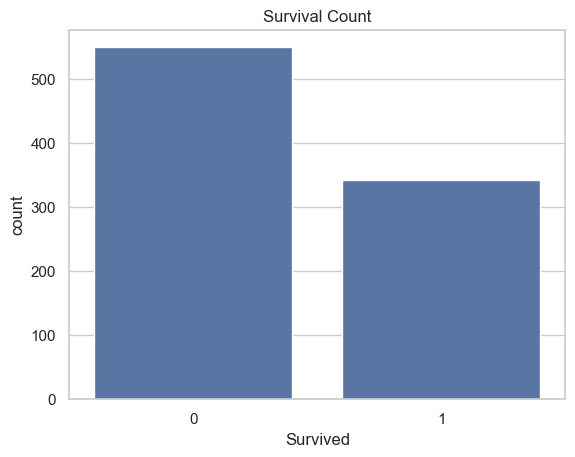

In [36]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

#### Gives a direct view of survival ratio. In Titanic data, non-survivors usually outnumber survivors.

### 15. How to compare survival count by gender?

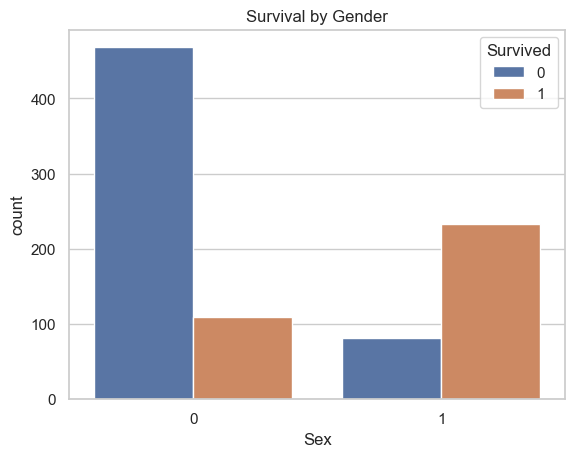

In [37]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

#### Females usually had higher survival rates due to the "women and children first" policy. This chart confirms the pattern.

### 16. How to compare survival count by passenger class?

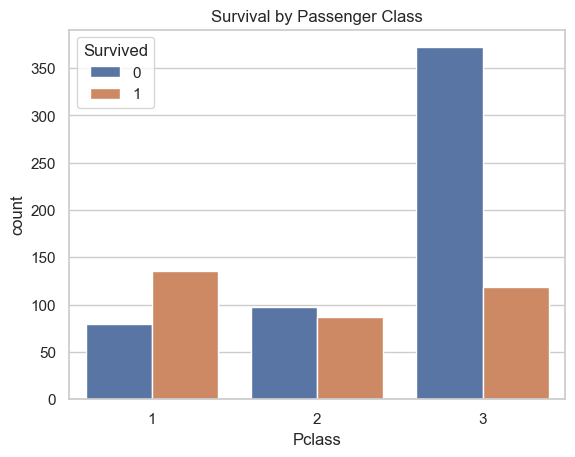

In [38]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

#### 1st class passengers had better chances of survival. This bar chart supports the idea of class-based rescue prioritization.

### 17. How to analyze survival based on Age?

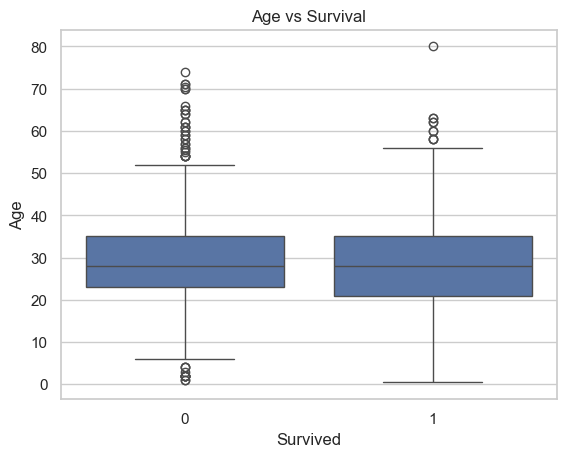

In [39]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()

#### Boxplot shows age ranges of survivors vs non-survivors. Often, children had slightly better survival, and older passengers had lower chances.

### 18. How to analyze survival based on Fare?

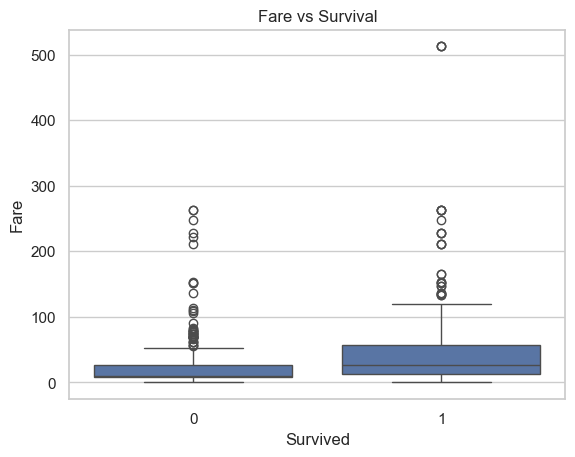

In [40]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")
plt.show()

#### Boxplot comparison indicates that survivors tended to have paid higher fares—indirectly linking fare with social class and safety access.

### 19. How to show correlation between numerical columns?

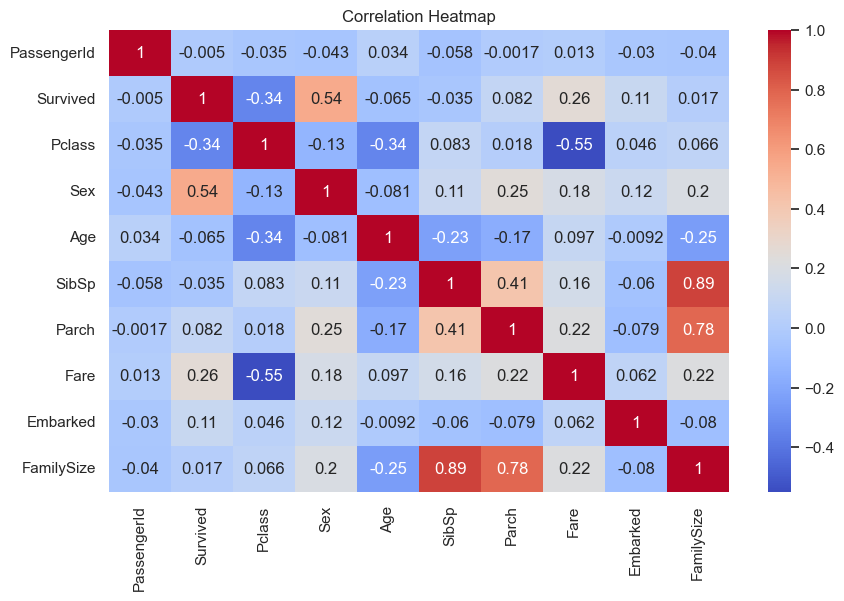

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#### Heatmap reveals relationships among features like Fare, Pclass, Age, and Survived. Stronger correlations help in feature selection for models.

### 20. How to analyze survival by passenger title?

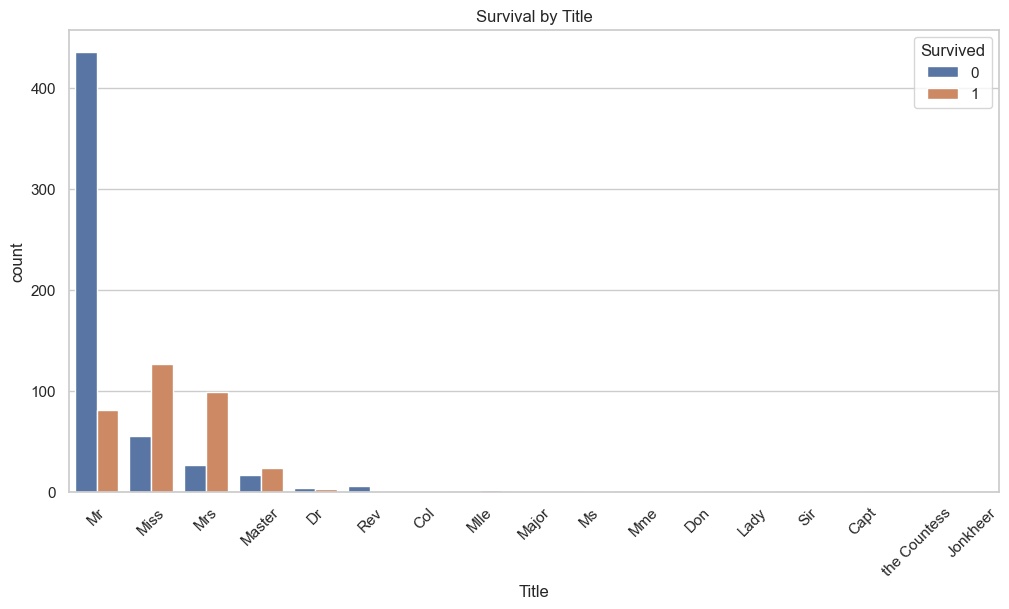

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Title', hue='Survived', data=df, order=df['Title'].value_counts().index)
plt.title("Survival by Title")
plt.xticks(rotation=45)
plt.show()

#### Custom titles (like Mr., Mrs., Miss, Master, etc.) indicate age/gender/social status. Certain titles (like Master or Mrs.) may show higher survival.

## Summary
#### The Exploratory Data Analysis (EDA) of the Titanic dataset revealed several key insights. The dataset was cleaned by handling missing values in the 'Age', 'Embarked', and 'Cabin' columns using appropriate strategies. New features such as 'Title' and 'FamilySize' were created to enhance the analysis. Univariate analysis showed that most passengers were young males in 3rd class, with fares heavily skewed toward lower amounts. In the bivariate analysis, females and 1st class passengers had significantly higher survival rates, while younger passengers and those who paid higher fares were more likely to survive. The correlation heatmap highlighted strong relationships between variables such as fare, class, gender, and survival. Overall, the analysis confirmed that gender, passenger class, age, and fare were strong predictors of survival, and feature engineering further enriched the dataset for potential machine learning applications.